## Categorical Feature Analysis

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(
    filepath_or_buffer='../data/raw/hotel_reservations.csv',
    sep=',',
    header=0
)
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
# Select columns that have object data type
data.select_dtypes(include=['object']).head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled


### Analysis of categorical feature type_of_meal_plan

In [4]:
# Display the frequency of each unique value in the column type_of_meal_plan and its percentage
data['type_of_meal_plan'].value_counts().to_frame().join(
    other=data['type_of_meal_plan'].value_counts(normalize=True).to_frame(),
    lsuffix='_count',
    rsuffix='_percentage'
)

,count,proportion
type_of_meal_plan,,
Meal Plan 1,27835,0.767333
Not Selected,5130,0.141420
Meal Plan 2,3305,0.091110
Meal Plan 3,5,0.000138


In [5]:
# Import the matplotlib and seaborn libraries
import seaborn as sns
import matplotlib.pyplot as plt

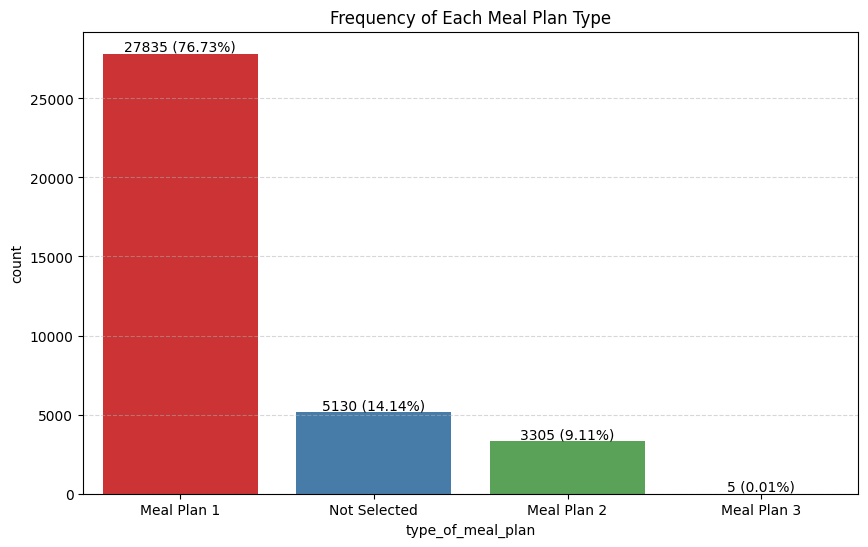

In [6]:
# Plot the frequency of each unique value in the column type_of_meal_plan
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='type_of_meal_plan',
    data=data,
    palette='Set1',
    hue='type_of_meal_plan'
)

# Add count and percentage labels to the top of each bar
total = len(data['type_of_meal_plan'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.2f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)} ({percentage})', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Frequency of Each Meal Plan Type')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/meal_plan_type_frequency.png')

# Display the plot
plt.show()

In [7]:
# Cross-tabulation of the column type_of_meal_plan and the column booking_status
pd.crosstab(
    index=data['type_of_meal_plan'],
    columns=data['booking_status'],
    margins=True,
    margins_name='Total'
)

booking_status,Canceled,Not_Canceled,Total
type_of_meal_plan,,,
Meal Plan 1,8679,19156,27835
Meal Plan 2,1506,1799,3305
Meal Plan 3,1,4,5
Not Selected,1699,3431,5130
Total,11885,24390,36275


<Figure size 1000x600 with 0 Axes>

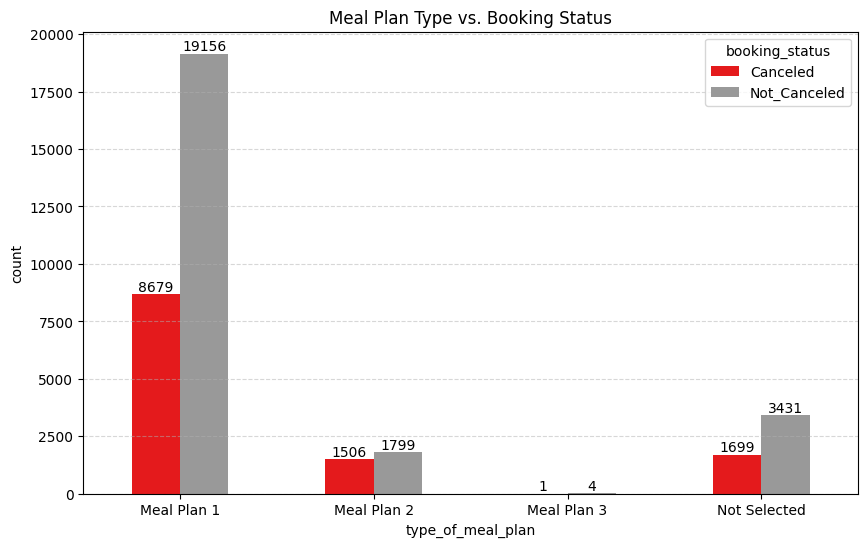

In [8]:
# Plot the cross-tabulation of the column type_of_meal_plan and the column booking_status
plt.figure(figsize=(10, 6))
ax = pd.crosstab(
    index=data['type_of_meal_plan'],
    columns=data['booking_status']
).plot(
    kind='bar',
    stacked=False,  # Set stacked to False
    figsize=(10, 6),
    colormap='Set1'  # Use a color scheme instead of specifying colors
)

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set the y-label name to "count"
ax.set_ylabel('count')

# Add count labels to the top of each bar
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)}', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Meal Plan Type vs. Booking Status')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/meal_plan_type_vs_booking_status.png')

# Display the plot
plt.show()

### Analysis of categorical feature room_type_reserved

In [9]:
# Display the frequency of each unique value in the column room_type_reserved and its percentage
data['room_type_reserved'].value_counts().to_frame().join(
    other=data['room_type_reserved'].value_counts(normalize=True).to_frame(),
    lsuffix='_count',
    rsuffix='_percentage'
)

,count,proportion
room_type_reserved,,
Room_Type 1,28130,0.775465
Room_Type 4,6057,0.166975
Room_Type 6,966,0.026630
Room_Type 2,692,0.019076
Room_Type 5,265,0.007305
Room_Type 7,158,0.004356
Room_Type 3,7,0.000193


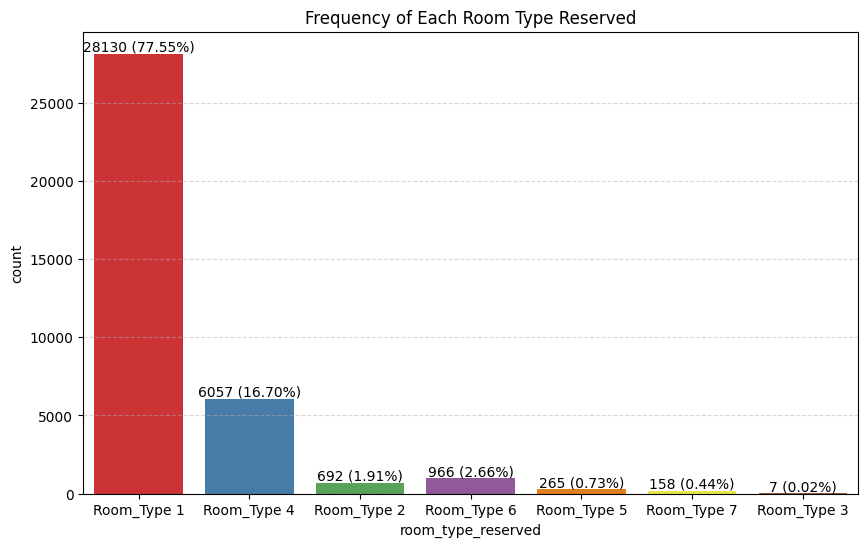

In [10]:
# Plot the frequency of each unique value in the column room_type_reserved
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='room_type_reserved',
    data=data,
    palette='Set1',
    hue='room_type_reserved'
)

# Add count and percentage labels to the top of each bar
total = len(data['room_type_reserved'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.2f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)} ({percentage})', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Frequency of Each Room Type Reserved')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/room_type_reserved_frequency.png')

# Display the plot
plt.show()

In [11]:
# Cross-tabulation of the column room_type_reserved and the column booking_status
pd.crosstab(
    index=data['room_type_reserved'],
    columns=data['booking_status'],
    margins=True,
    margins_name='Total'
)

booking_status,Canceled,Not_Canceled,Total
room_type_reserved,,,
Room_Type 1,9072,19058,28130
Room_Type 2,228,464,692
Room_Type 3,2,5,7
Room_Type 4,2069,3988,6057
Room_Type 5,72,193,265
Room_Type 6,406,560,966
Room_Type 7,36,122,158
Total,11885,24390,36275


<Figure size 1000x600 with 0 Axes>

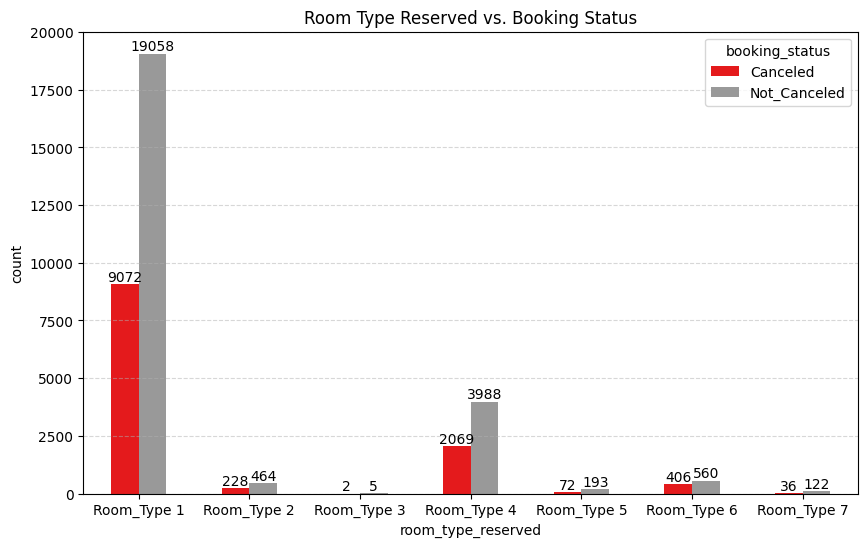

In [12]:
# Plot the cross-tabulation of the column type_of_meal_plan and the column booking_status
plt.figure(figsize=(10, 6))
ax = pd.crosstab(
    index=data['room_type_reserved'],
    columns=data['booking_status']
).plot(
    kind='bar',
    stacked=False,  # Set stacked to False
    figsize=(10, 6),
    colormap='Set1'  # Use a color scheme instead of specifying colors
)

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set the y-label name to "count"
ax.set_ylabel('count')

# Add count labels to the top of each bar
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)}', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Room Type Reserved vs. Booking Status')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/room_type_reserved_vs_booking_status.png')

# Display the plot
plt.show()

### Analysis of categorical feature market_segment_type

In [13]:
# Display the frequency of each unique value in the column market_segment_type and its percentage
data['market_segment_type'].value_counts().to_frame().join(
    other=data['market_segment_type'].value_counts(normalize=True).to_frame(),
    lsuffix='_count',
    rsuffix='_percentage'
)

,count,proportion
market_segment_type,,
Online,23214,0.639945
Offline,10528,0.290227
Corporate,2017,0.055603
Complementary,391,0.010779
Aviation,125,0.003446


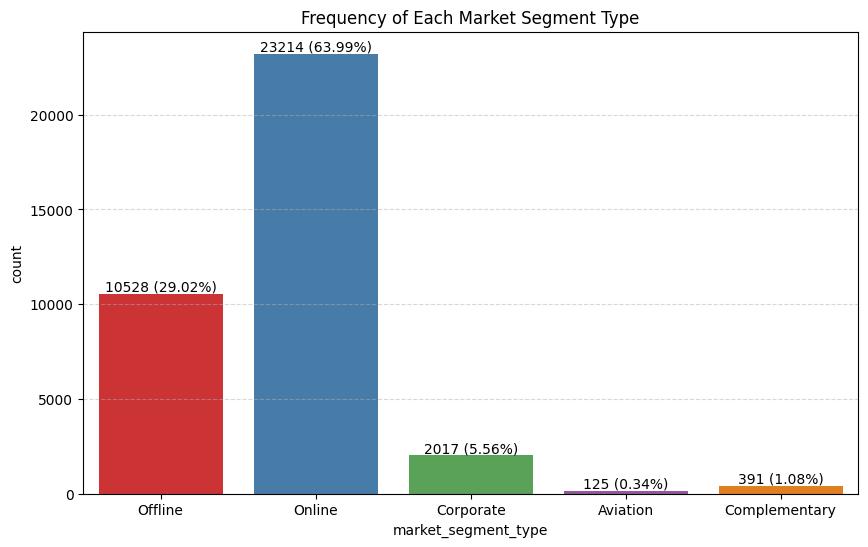

In [14]:
# Plot the frequency of each unique value in the column market_segment_type
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='market_segment_type',
    data=data,
    palette='Set1',
    hue='market_segment_type'
)

# Add count and percentage labels to the top of each bar
total = len(data['market_segment_type'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.2f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)} ({percentage})', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Frequency of Each Market Segment Type')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/market_segment_type_frequency.png')

# Display the plot
plt.show()

In [15]:
# Cross-tabulation of the column market_segment_type and the column booking_status
pd.crosstab(
    index=data['market_segment_type'],
    columns=data['booking_status'],
    margins=True,
    margins_name='Total'
)

booking_status,Canceled,Not_Canceled,Total
market_segment_type,,,
Aviation,37,88,125
Complementary,0,391,391
Corporate,220,1797,2017
Offline,3153,7375,10528
Online,8475,14739,23214
Total,11885,24390,36275


<Figure size 1000x600 with 0 Axes>

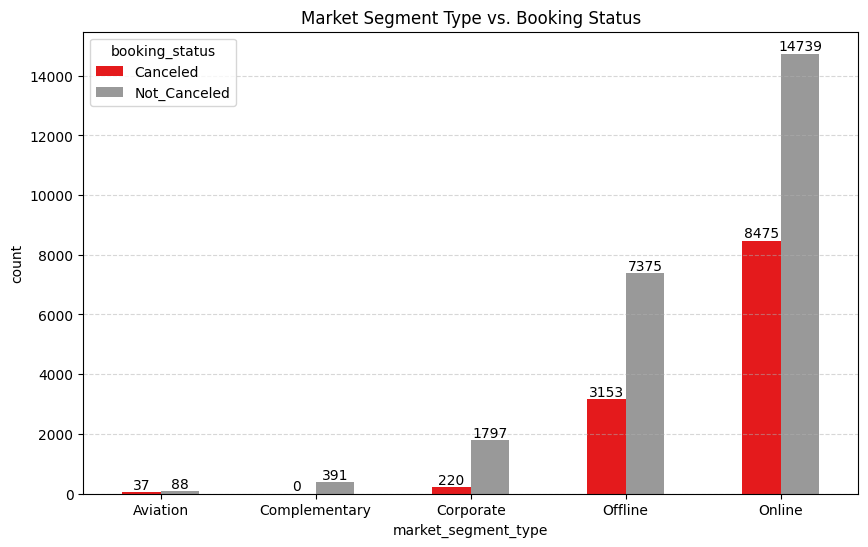

In [16]:
# Plot the cross-tabulation of the column market_segment_type and the column booking_status
plt.figure(figsize=(10, 6))
ax = pd.crosstab(
    index=data['market_segment_type'],
    columns=data['booking_status']
).plot(
    kind='bar',
    stacked=False,  # Set stacked to False
    figsize=(10, 6),
    colormap='Set1'  # Use a color scheme instead of specifying colors
)

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set the y-label name to "count"
ax.set_ylabel('count')

# Add count labels to the top of each bar
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)}', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Market Segment Type vs. Booking Status')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/market_segment_type_vs_booking_status.png')

# Display the plot
plt.show()

### Analysis of categorical feature booking_status

In [17]:
# Display the frequency of each unique value in the column booking_status and its percentage
data['booking_status'].value_counts().to_frame().join(
    other=data['booking_status'].value_counts(normalize=True).to_frame(),
    lsuffix='_count',
    rsuffix='_percentage'
)

,count,proportion
booking_status,,
Not_Canceled,24390,0.672364
Canceled,11885,0.327636


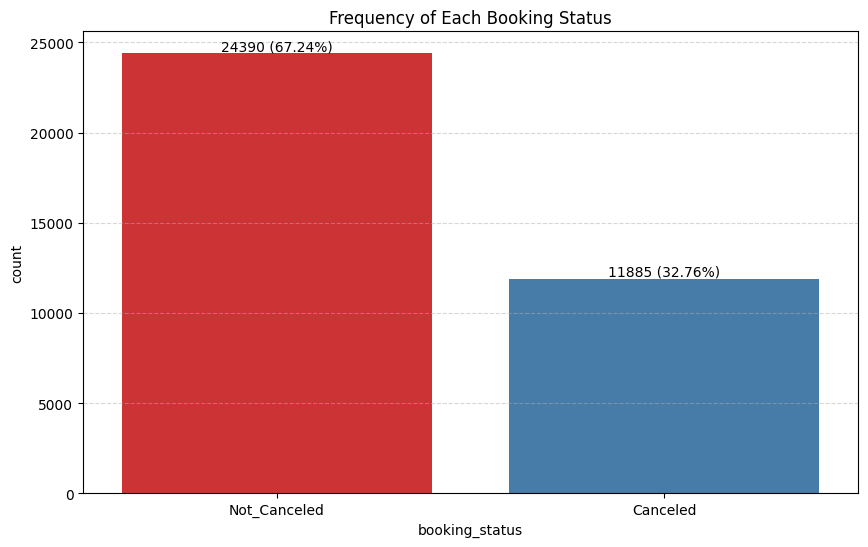

In [18]:
# Plot the frequency of each unique value in the column booking_status
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='booking_status',
    data=data,
    palette='Set1',
    hue='booking_status'
)

# Add count and percentage labels to the top of each bar
total = len(data['booking_status'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.2f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(count)} ({percentage})', (x, y), ha='center', va='bottom')

# Add title to the plot
ax.set_title('Frequency of Each Booking Status')

# Add grid at the back of the plot
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Save the plot as a PNG file
plt.savefig('../reports/images/booking_status_frequency.png')

# Display the plot
plt.show()